# Introduction to the Paper Data


#### Further References:


In [ ]:
%load_ext autoreload
%autoreload 2

In [1]:
import pm4py

#### 1. Import the Event Log for Interface Pattern IP-1


In [2]:
# Load the event log
df_log = pm4py.read_xes(
    "/workspaces/university-petri-nets/backend/data_catalog/compositional_process_discovery_experiment_data/IP-2/IP2_initial_log.xes",
)
display(df_log.head(5))

parsing log, completed traces ::   0%|          | 0/5000 [00:00<?, ?it/s]

,concept:name,lifecycle:transition,time:timestamp,case:concept:name
0,t2,complete,2021-03-02 16:13:11+00:00,Trace 1
1,q2,complete,2021-03-02 16:17:26+00:00,Trace 1
2,q1,complete,2021-03-02 16:22:24+00:00,Trace 1
3,t4,complete,2021-03-02 18:02:10+00:00,Trace 1
4,q3,complete,2021-03-02 18:08:52+00:00,Trace 1


In [3]:
# need dateas column and not index, but make sure sorted
df_log = df_log.sort_values("time:timestamp").reset_index(drop=True)

In [4]:
# Some basic statistics
# number of events
print(f"Number of Events: {len(df_log)}")
print(f"Number of Agents: {len(df_log['org:resource'].unique())}")
print(f"Number of Cases: {len(df_log['concept:name'].unique())}")
print(
    f"From {df_log['time:timestamp'].min()} to {df_log['time:timestamp'].max()}. Is Sorted: {df_log['time:timestamp'].is_monotonic_increasing}",
)

Number of Events: 149988


KeyError: 'org:resource'

In [5]:
print(f"Length of each trace: {[len(x) for x in df_log]}")

Length of each trace: [12, 20, 14, 17]


#### 2. Get the Petri Nets


/usr/local/lib/python3.12/site-packages/pm4py/objects/petri_net/importer/variants/pnml.py:354: UserWarning: the Petri net has been imported without a specified final marking. Please create it using the method pm4py.generate_marking
  warnings.warn("the Petri net has been imported without a specified final marking. Please create it using the method pm4py.generate_marking")


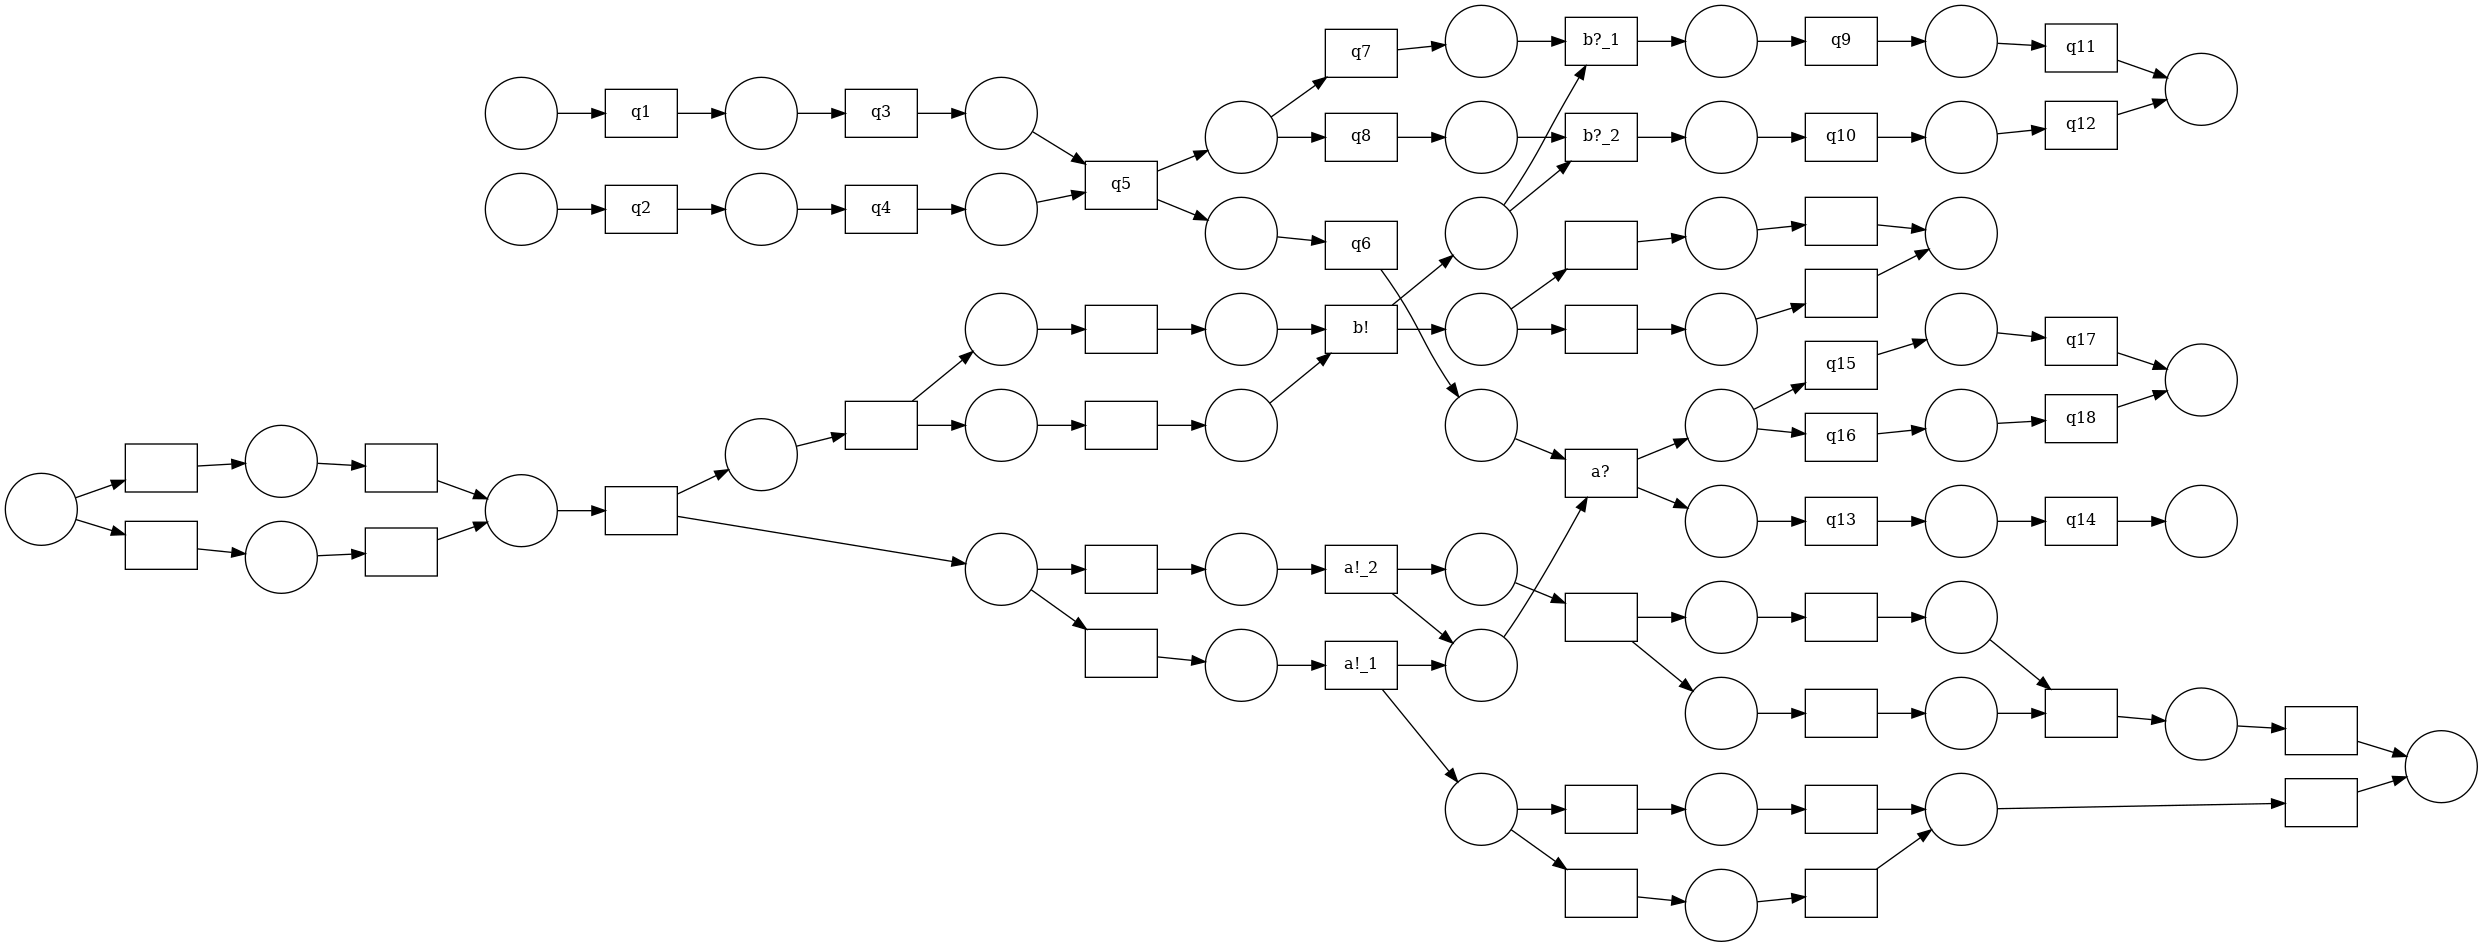

In [6]:
# Reference process model
pn_ref_model, initial_marking, final_marking = pm4py.read_pnml(
    "/workspaces/university-petri-nets/backend/data_catalog/compositional_process_discovery_experiment_data/IP-2/IP2_ref_model.pnml",
)
pm4py.view_petri_net(pn_ref_model)

/usr/local/lib/python3.12/site-packages/pm4py/objects/petri_net/importer/variants/pnml.py:354: UserWarning: the Petri net has been imported without a specified final marking. Please create it using the method pm4py.generate_marking
  warnings.warn("the Petri net has been imported without a specified final marking. Please create it using the method pm4py.generate_marking")


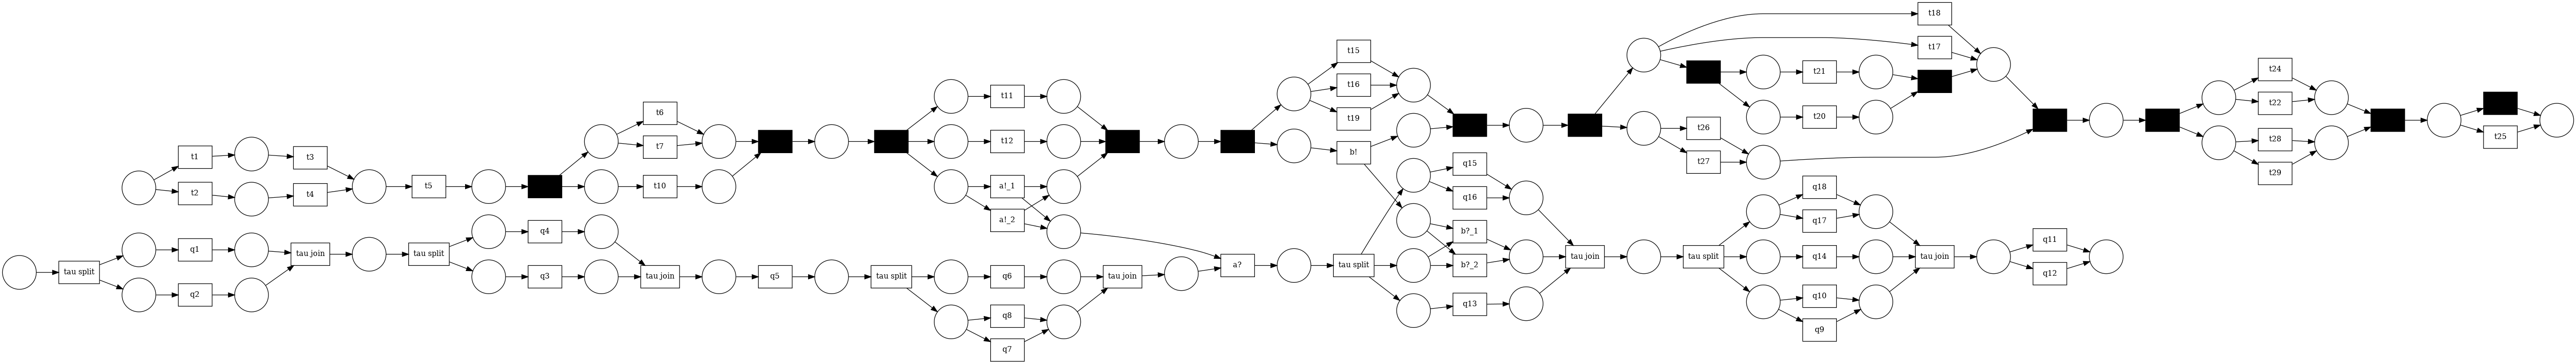

In [7]:
# compositionally mined process model
pn_coposition_mined, initial_marking, final_marking = pm4py.read_pnml(
    "/workspaces/university-petri-nets/backend/data_catalog/compositional_process_discovery_experiment_data/IP-2/IP2_composition_mined.pnml",
)
pm4py.view_petri_net(pn_coposition_mined)

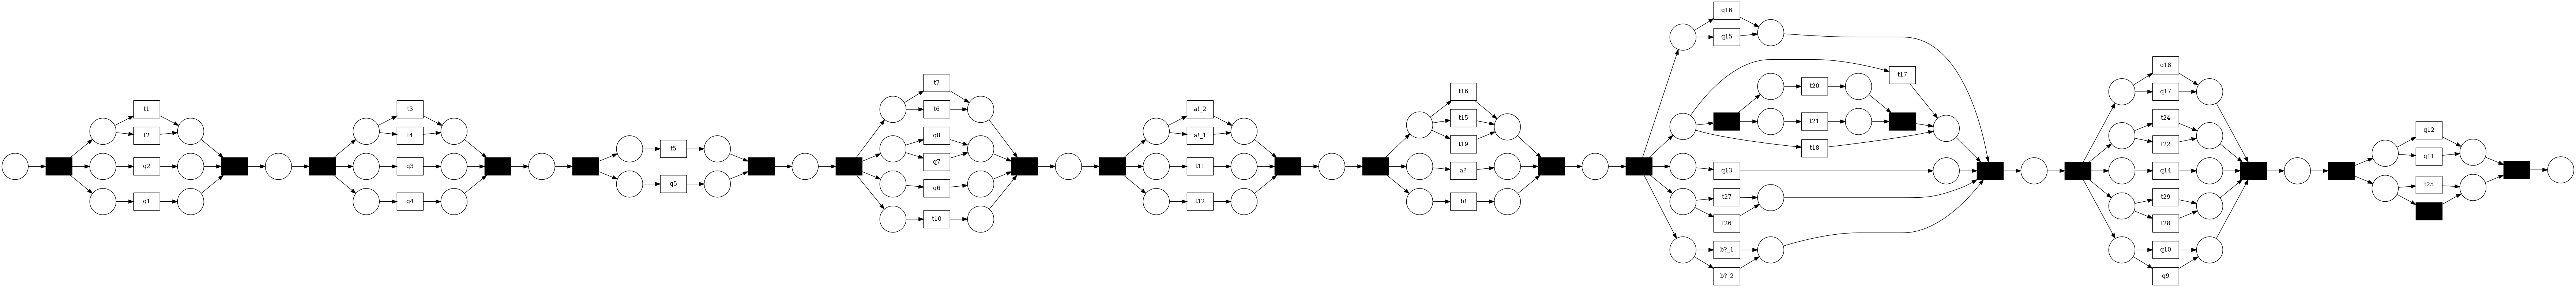

In [8]:
# Directly mined Process model
pn_directly_mined, initial_marking, final_marking = pm4py.read_pnml(
    "/workspaces/university-petri-nets/backend/data_catalog/compositional_process_discovery_experiment_data/IP-2/IP2_directly_mined.pnml",
)
pm4py.view_petri_net(pn_directly_mined)